In [1]:
from pyneuroml import pynml
import os
import matplotlib.pyplot as plt
import numpy as np

In [14]:
model = "483108201" #this is perisomatic
# model = '497232312' #active
# /home/anujanegi/tj/AllenInstituteNeuroML/CellTypesDatabase/models/472450023/modfiles

pyNeuroML >>> INFO - Converting NeuroML2 file: ../NeuroML2/Cell_483108201.cell.nml to PNG
pyNeuroML >>> INFO - Executing: (java -Xmx400M  -jar  "/home/anujanegi/anaconda3/envs/allen/lib/python3.7/site-packages/pyneuroml/lib/jNeuroML-0.12.0-jar-with-dependencies.jar"  "../NeuroML2/Cell_483108201.cell.nml" -png) in directory: .
pyNeuroML >>> INFO - Command completed. Output: 
  jNeuroML >>   jNeuroML v0.12.0
  jNeuroML >>  Writing to: /home/anujanegi/tj/AllenInstituteNeuroML/CellTypesDatabase/models/summary/../NeuroML2/Cell_483108201.cell.png
  jNeuroML >>  


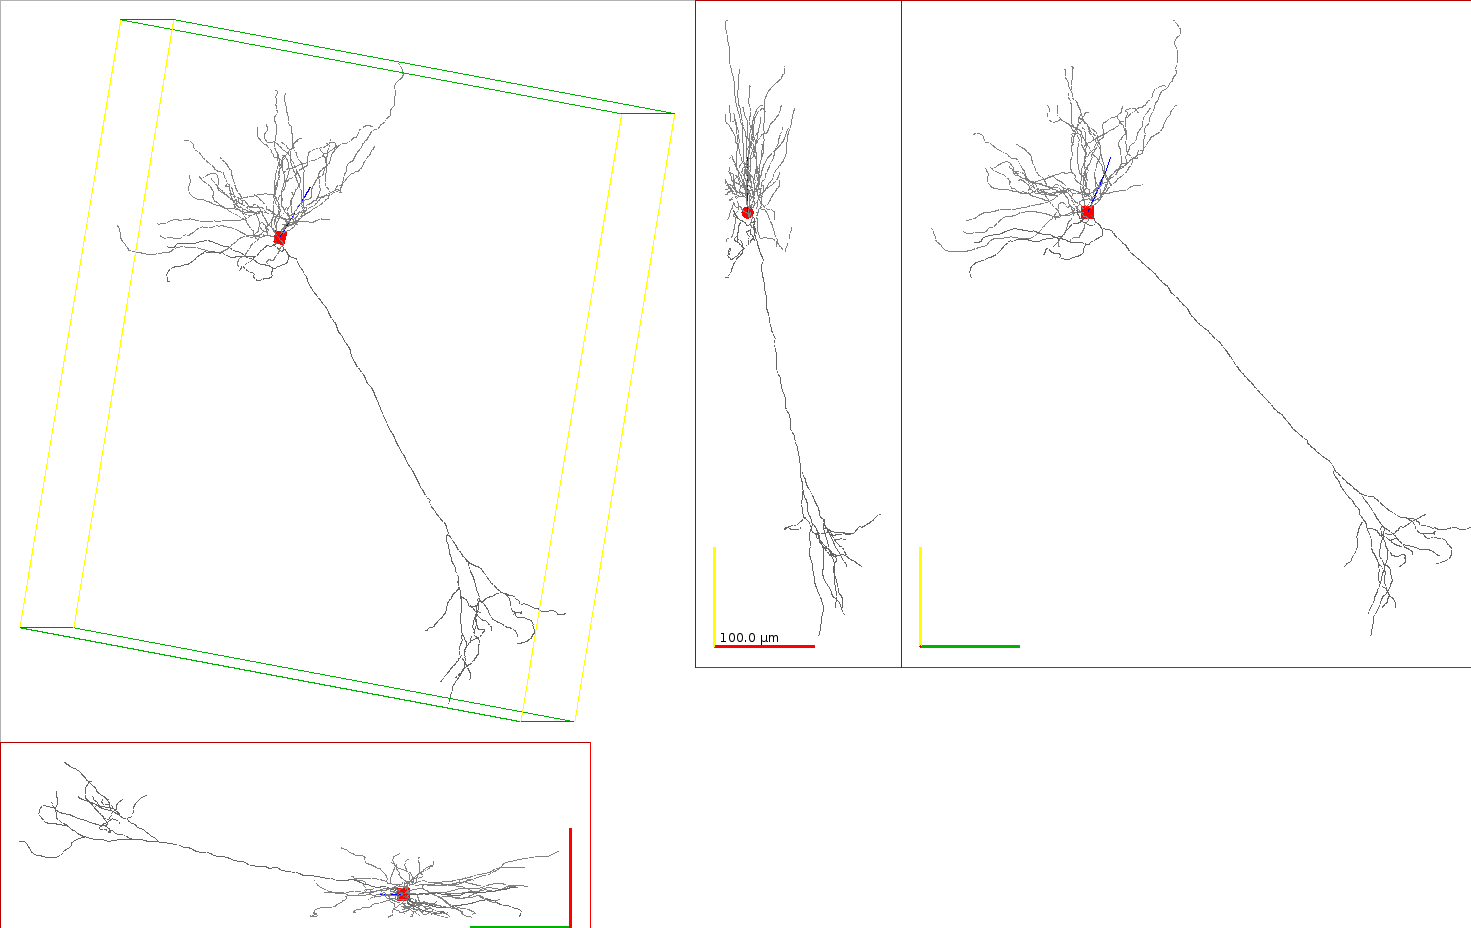

In [15]:
# 3d structure
NML_FILE = f'../NeuroML2/Cell_{model}.cell.nml'
pynml.nml2_to_png(NML_FILE)


from IPython.display import Image
Image(filename=f'../NeuroML2/Cell_{model}.cell.png')

In [16]:
# plot from LEMs run
LEMS_DAT_FILE = f'../NeuroML2/{model}.Pop_Cell_{model}.v.dat'
data, i = pynml.reload_standard_dat_file(LEMS_DAT_FILE)

v_lems = data[0]
t_lems = data['t']

pyNeuroML >>> INFO - Loaded data from ../NeuroML2/483108201.Pop_Cell_483108201.v.dat; columns: [0]


In [17]:
# plot from neuron run
DAT_FILE = [i for i in os.listdir(f'../{model}') if 'v.dat' in i][0]
data, i = pynml.reload_standard_dat_file(f'../{model}/{DAT_FILE}')
v = data[0]
t = data['t']

pyNeuroML >>> INFO - Loaded data from ../483108201/sweep_55.v.dat; columns: [0]


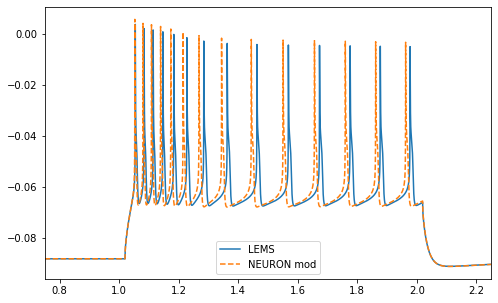

In [19]:
plt.rcParams["figure.figsize"] = (8, 5)
plt.plot(t_lems, v_lems, label='LEMS')
plt.plot(t, v, '--', label='NEURON mod')
plt.xlim([.75, 2.25])
# plt.xlabel('Time (ms)')
# plt.ylabel('Membrane Potential (mV)')
plt.legend()
# plt.show()

plt.savefig('test.png')